In [6]:
import numpy as np
import pandas as pd
# import tensorflow as tf
# import glob
!pip install opencv-python
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# import random
# from tensorflow.keras.applications.resnet import preprocess_input
# import tensorflow.keras as keras
# from tensorflow.keras.models import load_model, Model
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.layers import Add,Concatenate, MaxPooling2D,Activation, Dense, Flatten, Input, Lambda, Conv2D, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D, Conv2DTranspose
# from tensorflow.keras  import backend as K
from PIL import Image
import os

# Predict car's Bounding Box with Yolov5

In [7]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu113 CPU


Setup complete ✅ (60 CPUs, 172.7 GB RAM, 699.4/3519.6 GB disk)


In [1]:
!pwd

/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/group_00088_shared_workspace/datasets


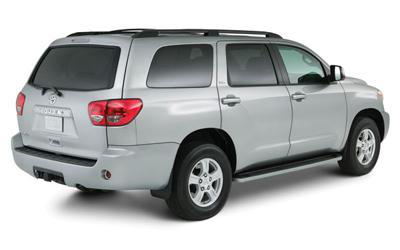

(400, 250)

In [8]:
_img = Image.open("../datasets_train/train/1000407040.jpg")
_img.show()
_img.size


# Code

In [41]:
# !python detect.py --weights yolov5s.pt --img 250 --save-txt --save-conf --save-crop --conf 0.5 --source ../datasets_train/train
# Next run try this one: exp 4
# !python detect.py --weights yolov5l.pt --img 250 --save-txt --save-conf --save-crop --conf 0.25 --source ../datasets_train/train
# Exp 5 try to improve accuracy Good/accuracy inference
!python detect.py --weights yolov5l.pt --img 416 --save-txt --save-conf --save-crop --conf 0.25 --source ../datasets_train/train


detect: weights=['yolov5l.pt'], source=../datasets_train/train, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-14-g8a66eba torch 1.10.0+cu113 CPU

Fusing layers... 
Model Summary: 367 layers, 46533693 parameters, 0 gradients, 109.1 GFLOPs
image 1/2641 /home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/group_00088_shared_workspace/datasets/datasets_train/train/1000407040.jpg: 288x416 1 car, Done. (0.181s)
image 2/2641 /home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/group_00088_shared_workspace/datasets/datasets_train/train/1000800256.jpg: 224x416 1 car, Done. (0.170s)
image 3/2641 /home/jovyan/activities_dat

## Read data

In [44]:
_pred = pd.read_csv("./runs/detect/exp5/labels/1000407040.txt", sep=" ", names=["c", "bx", "by", "bw", "bh","conf"])
_pred

,c,bx,by,bw,bh,conf
0,2,0.4975,0.498,0.95,0.772,0.889256


In [45]:
class BoundingBox():
    """BoundingBox output from Yolo inference"""

    def __init__(self, path: str, serie: pd.Series):
        """
        Parameters
        -----------
        path: String, path to the image inference
        serie: pd.Series, Yolo output in format 
            c=class, 
            bx=boundin box center x
            by=bounding box _center y
            bh=bounding box height
            bw=bounding box width
            conf=confidence
        """
        self.image = Image.open(path)
        self.c = serie.c
        self.bx = serie.bx
        self.by = serie.by
        self.bh = serie.bh
        self.bw = serie.bw
        self.conf = serie.conf

    def bb_plot(self):
        """Plot dectected bounding box on image"""
        imw = self.image.size[0]
        imh = self.image.size[1]

        bottom_x = (self.bx - (self.bw / 2))*imw
        bottom_y = (self.by - (self.bh / 2))*imh
        _, axe = plt.subplots()
        axe.imshow(self.image)
        # Create a Rectangle patch
        rect = patches.Rectangle(
            (bottom_x, bottom_y),
            self.bw * imw,
            self.bh * imh,
            linewidth=1,
            edgecolor="r",
            facecolor="none"
        )
        # Add the patch to the Axes
        axe.add_patch(rect)
        plt.show()

    def to_evaluation(self):
        """Transform yolo's bounding box format to the evaluation format"""
        imw = self.image.size[0]
        imh = self.image.size[1]
        # get locations xmin, ymin, xmax, ymax
        xmin = (self.bx - (self.bw / 2))*imw
        ymin = (self.by - (self.bh / 2))*imh
        xmax = (self.bx + (self.bw / 2))*imw
        ymax = (self.by + (self.bh / 2))*imh
        return pd.Series({
            "x_min": xmin,
            "y_min": ymin,
            "x_max": xmax,
            "y_max": ymax})

    
# box = BoundingBox("../datasets_train/train/1000407040.jpg", pred.loc[0])
# box.bb_plot()

,x_min,y_min,x_max,y_max,class,models,iou
im_name,,,,,,,
107347968.jpg,40.0,244.0,1144.0,637.0,car,Audi S5 Convertible 2012,NaN
91160576.jpg,4.0,9.0,98.0,76.0,car,Audi 100 Wagon 1994,NaN
273809408.jpg,16.0,4.0,288.0,191.0,car,Cadillac SRX SUV 2012,NaN
579534848.jpg,14.0,23.0,255.0,178.0,car,Ford Freestar Minivan 2007,NaN
950599680.jpg,4.0,70.0,321.0,215.0,car,Rolls-Royce Phantom Sedan 2012,NaN


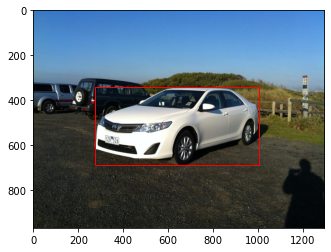

In [46]:
IMG_DIR = "../datasets_train/train/"
DETECT_DIR = "./runs/detect/exp5/labels/"


def biggest_box(pred_df):
    """Returns: pd.Series, inferences of the highest area box"""
    return pred_df.sort_values("area", ascending=False).iloc[0,:]


def select_inference_from_file(img_name):
    """Select the car's inference with the maximal area
    Parameter : file name with .jpg extension
    Returns: Class BoundingBox"""

    def area(box):
        """Compute the area
        Parameter: BoundingBox
        Return: Float """
        return box.bw * box.bh

    # delete the image extention (.jpg) and replace with .txt
    pred_file = os.path.splitext(img_name)[0]+".txt"
    pred_path = os.path.join(DETECT_DIR, pred_file)
    cols = ["c", "bx", "by", "bw", "bh", "conf"]
    try:
        pred_df = pd.read_csv(
            pred_path,
            sep=" ",
            names=cols
        )
        pred_df = pred_df[(pred_df.c == 2) | (pred_df.c == 7)]
        # Test if inference predicted the class car or truck (index=2 and 7)
        if len(pred_df) > 0:
            # If there is more than one inference, select the box with the biggest area
            if len(pred_df) > 1:
                pred_df["area"] = pred_df.apply(area, axis=1)
                inference = biggest_box(pred_df)
            # If not, select the first instance
            else:
                inference = pred_df.iloc[0,:]
        # if there is no car predicted, return a null vector
        else:
            inference = pd.Series(
                np.zeros(6),
                index=cols
            )
    except FileNotFoundError:
        # print("Yolo didn't make any inference on this image")
        inference = pd.Series(
            np.zeros(6),
            index=cols
        )
    return BoundingBox(os.path.join(IMG_DIR, img_name), inference)

_img_name = "1009909760.jpg"
_predicted_box = select_inference_from_file(_img_name)
_predicted_box.bb_plot()

In [47]:
# IOU implémentation
# pred = predicted_box.to_evaluation()
# pred
annotation_truth = pd.read_csv("../datasets_train/train_annotation/_annotation.csv", index_col=0)
annotation_truth = annotation_truth.set_index("im_name")
annotation_truth["iou"] = np.nan
annotation_truth.head()

,x_min,y_min,x_max,y_max,class,models,iou
im_name,,,,,,,
107347968.jpg,40.0,244.0,1144.0,637.0,car,Audi S5 Convertible 2012,NaN
91160576.jpg,4.0,9.0,98.0,76.0,car,Audi 100 Wagon 1994,NaN
273809408.jpg,16.0,4.0,288.0,191.0,car,Cadillac SRX SUV 2012,NaN
579534848.jpg,14.0,23.0,255.0,178.0,car,Ford Freestar Minivan 2007,NaN
950599680.jpg,4.0,70.0,321.0,215.0,car,Rolls-Royce Phantom Sedan 2012,NaN


### IOU loss function implementation

In [48]:
# compute IOU
## compute the intersection of topleft anf rightbottom
# 𝑥𝑖𝑛𝑡𝑒𝑟1=𝑚𝑎𝑥(𝑥𝑚𝑖𝑛𝑖,𝑥̂ 𝑚𝑖𝑛𝑖) 
# 𝑥𝑖𝑛𝑡𝑒𝑟2=𝑚𝑖𝑛(𝑥𝑚𝑎𝑥𝑖,𝑥̂ 𝑚𝑎𝑥𝑖) 
# 𝑦𝑖𝑛𝑡𝑒𝑟1=𝑚𝑎𝑥(𝑦𝑚𝑖𝑛𝑖,𝑦̂ 𝑚𝑖𝑛𝑖) 
# 𝑦𝑖𝑛𝑡𝑒𝑟2=𝑚𝑖𝑛(𝑦𝑚𝑎𝑥𝑖,𝑦̂ 𝑚𝑎𝑥𝑖)

# 𝑤𝑖𝑑𝑡ℎ_𝑖𝑛𝑡𝑒𝑟=𝑥𝑖𝑛𝑡𝑒𝑟2−𝑥𝑖𝑛𝑡𝑒𝑟1 
# ℎ𝑒𝑖𝑔ℎ𝑡_𝑖𝑛𝑡𝑒𝑟=𝑦𝑖𝑛𝑡𝑒𝑟2−𝑦𝑖𝑛𝑡𝑒𝑟1 
# 𝑎𝑟𝑒𝑎_𝑖𝑛𝑡𝑒𝑟=ℎ𝑒𝑖𝑔ℎ𝑡_𝑖𝑛𝑡𝑒𝑟⋅𝑤𝑖𝑑𝑡ℎ_𝑖𝑛𝑡𝑒𝑟

# 𝑤𝑖𝑑𝑡ℎ_𝑏𝑜𝑥1=𝑥̂ 𝑚𝑎𝑥𝑖−𝑥̂ 𝑚𝑖𝑛𝑖 
# ℎ𝑒𝑖𝑔ℎ𝑡_𝑏𝑜𝑥1=𝑦̂ 𝑚𝑎𝑥𝑖−𝑦̂ 𝑚𝑖𝑛𝑖 
# 𝑤𝑖𝑑𝑡ℎ_𝑏𝑜𝑥2=𝑥𝑚𝑎𝑥𝑖−𝑥𝑚𝑖𝑛𝑖 
# ℎ𝑒𝑖𝑔ℎ𝑡_𝑏𝑜𝑥2=𝑦𝑚𝑎𝑥𝑖−𝑦𝑚𝑖𝑛𝑖 
# 𝑎𝑟𝑒𝑎_𝑏𝑜𝑥1=𝑤𝑖𝑑𝑡ℎ_𝑏𝑜𝑥1⋅ℎ𝑒𝑖𝑔ℎ𝑡_𝑏𝑜𝑥1 
# 𝑎𝑟𝑒𝑎_𝑏𝑜𝑥2=𝑤𝑖𝑑𝑡ℎ_𝑏𝑜𝑥2⋅ℎ𝑒𝑖𝑔ℎ𝑡_𝑏𝑜𝑥2

# 𝑎𝑟𝑒𝑎_𝑢𝑛𝑖𝑜𝑛=𝑎𝑟𝑒𝑎_𝑏𝑜𝑥1+𝑎𝑟𝑒𝑎_𝑏𝑜𝑥2−𝑎𝑟𝑒𝑎_𝑖𝑛𝑡𝑒𝑟

def area(box):
    width = box.x_max-box.x_min
    height = box.y_max - box.y_min
    return width * height


def iou_loss_function(truth, pred):
    pred = pred.to_evaluation()
    # intersection
    xinter1 = max(truth.x_min, pred.x_min)
    xinter2 = min(truth.x_max, pred.x_max)
    yinter1 = max(truth.y_min, pred.y_min)
    yinter2 = min(truth.y_max, pred.y_max)
    # area
    width_inter = xinter2 - xinter1
    height_inter = yinter2 - yinter1
    area_inter = height_inter * width_inter
    # area for each box
    area_truth = area(truth)
    area_pred = area(pred)
    # final IOU
    area_union = area_truth + area_pred - area_inter
    return area_inter / area_union


_truth = annotation_truth.loc[_img_name]
iou_loss_function(_truth, _predicted_box)

0.93558811771928

In [49]:
annotation_truth.loc[_img_name]

x_min                       269.0
y_min                       335.0
x_max                      1011.0
y_max                       703.0
class                         car
models    Toyota Camry Sedan 2012
iou                           NaN
Name: 1009909760.jpg, dtype: object

### Full pipeline for evalutation on training set

In [58]:
# Read all files
images = os.listdir("../datasets_train/train")


def Pipeline():
    """blablabla"""
    results = []
    for img_name in images:
        if os.path.splitext(img_name)[-1] == ".jpg":
            predicted_box = select_inference_from_file(img_name)
            # predicted_box.bb_plot()
            # print(predicted_box.to_evaluation())
            truth = annotation_truth.loc[img_name]
            iou = iou_loss_function(truth, predicted_box)
            if truth["class"] == 'car':
                # print(truth)
                results.append(iou)
            annotation_truth.loc[img_name, "iou"] = iou
            # print(iou)
            # print(IOU(truth, predicted_box))
    return results


final_iou = Pipeline()

## Result Analysis

In [51]:
print("Overall score:", np.nanmean(final_iou))

Overall score: 0.9405002294855217


In [52]:
annotation_truth.sort_values("iou")

,x_min,y_min,x_max,y_max,class,models,iou
im_name,,,,,,,
813563904.jpg,8.000000,73.000000,98.000000,105.000000,car,Lamborghini Aventador Coupe 2012,-0.355516
90439680.jpg,3.000000,7.000000,253.000000,165.000000,car,Audi 100 Wagon 1994,0.000532
3604480.jpg,8.000000,5.000000,85.000000,69.000000,car,AM General Hummer SUV 2000,0.008183
787873792.jpg,27.000000,22.000000,317.000000,198.000000,car,Jeep Wrangler SUV 2012,0.011775
813105152.jpg,28.000000,12.000000,201.000000,107.000000,car,Lamborghini Aventador Coupe 2012,0.020871
...,...,...,...,...,...,...,...
9403488242.jpg,132.238000,371.477774,1871.606000,1200.390494,Land vehicle,,NaN
2224571280.jpg,242.737881,131.401610,686.737005,508.379060,Coffee cup,,NaN
146443543.jpg,457.746240,69.630292,2103.768560,1532.364560,Flower,,NaN


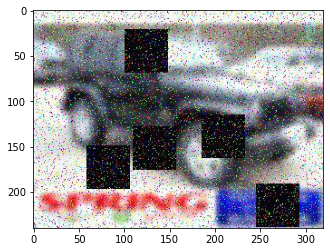

0.0

In [59]:
p = select_inference_from_file("787873792.jpg")
p.bb_plot()
p.c

In [54]:
annotation_truth.groupby("models").mean().sort_values("iou")

,x_min,y_min,x_max,y_max,iou
models,,,,,
Lamborghini Aventador Coupe 2012,89.500000,145.700000,598.900000,380.900000,0.703503
Audi 100 Wagon 1994,22.250000,53.312500,369.687500,226.375000,0.776415
Audi 100 Sedan 1994,56.500000,129.750000,586.625000,375.625000,0.829736
Rolls-Royce Phantom Sedan 2012,75.384615,84.307692,479.307692,298.153846,0.853335
Rolls-Royce Ghost Sedan 2012,89.250000,118.000000,661.000000,409.250000,0.862664
...,...,...,...,...,...
Suzuki SX4 Sedan 2012,77.818182,125.636364,787.727273,500.181818,0.971147
Acura ZDX Hatchback 2012,156.812500,203.937500,873.250000,547.312500,0.973889
Honda Accord Coupe 2012,54.750000,98.250000,550.375000,345.250000,0.974844


In [55]:
len(annotation_truth[annotation_truth.iou < 0.5])

13

In [56]:
## Prepare model
## Predict
## Loss
## Results analysis
## Energy consumption
annotation_truth[annotation_truth.models == "Maybach Landaulet Convertible 2012"]


,x_min,y_min,x_max,y_max,class,models,iou
im_name,,,,,,,
847773696.jpg,14.0,149.0,304.0,231.0,car,Maybach Landaulet Convertible 2012,0.941570
850067456.jpg,5.0,54.0,699.0,462.0,car,Maybach Landaulet Convertible 2012,0.980815
850722816.jpg,2.0,34.0,150.0,138.0,car,Maybach Landaulet Convertible 2012,0.977304
848429056.jpg,1.0,22.0,188.0,188.0,car,Maybach Landaulet Convertible 2012,0.946988
849215488.jpg,7.0,108.0,1241.0,738.0,car,Maybach Landaulet Convertible 2012,0.951882
849412096.jpg,104.0,38.0,652.0,466.0,car,Maybach Landaulet Convertible 2012,0.930658
850526208.jpg,61.0,28.0,1528.0,1105.0,car,Maybach Landaulet Convertible 2012,0.985238
848232448.jpg,7.0,129.0,796.0,475.0,car,Maybach Landaulet Convertible 2012,0.715504
850329600.jpg,81.0,107.0,434.0,313.0,car,Maybach Landaulet Convertible 2012,0.943563


In [57]:
# Assigned to car but not a car
annotation_truth[annotation_truth["class"] != "car"].dropna()


,x_min,y_min,x_max,y_max,class,models,iou
im_name,,,,,,,


In [60]:
annotation_truth.groupby("class").count()

,x_min,y_min,x_max,y_max,models,iou
class,,,,,,
Aircraft,3,3,3,3,3,3
Airplane,26,26,26,26,26,26
Animal,2,2,2,2,2,2
Antelope,2,2,2,2,2,2
Arm,6,6,6,6,6,6
...,...,...,...,...,...,...
Wine,3,3,3,3,3,3
Woman,15,15,15,15,15,15
Woodpecker,1,1,1,1,1,1


In [ ]:
len(annotation_truth)

In [79]:
# Final prediction pipeline
# predict for each test set image the bounding box then make a dataframe
# Read all files
IMAGES_PATH = "../datasets_train/train"
images = os.listdir(IMAGES_PATH)


def predict_pipeline():
    """Final pipeline
    Returns a dataframe"""

    cols = ["im_name", "x_min", "y_min", "x_max", "y_max", " e"]
    results_df = pd.DataFrame(
        np.zeros((len(images), len(cols))), columns=cols)
    results_df["im_name"] = images
    results_df = results_df.set_index("im_name")
    for img_name in images[:10]:
        if os.path.splitext(img_name)[-1] == ".jpg":
            predicted_box = select_inference_from_file(img_name)
            predicted_box = predicted_box.to_evaluation()
            results_df.at[img_name, "x_min"] = predicted_box.x_min
            results_df.at[img_name, "x_max"] = predicted_box.x_max
            results_df.at[img_name, "y_min"] = predicted_box.y_min
            results_df.at[img_name, "y_max"] = predicted_box.y_max
    results_df = results_df.reset_index()
    return results_df


final_iou = predict_pipeline()
final_iou

,im_name,x_min,y_min,x_max,y_max,e
0,567476224.jpg,10.000080,17.000060,274.000140,169.000060,0.0
1,992018432.jpg,22.999552,137.000064,1019.999744,534.999936,0.0
2,226623488.jpg,58.000000,14.000220,551.000000,397.000188,0.0
3,34865152.jpg,6.000000,38.000088,793.000000,428.000202,0.0
4,136380416.jpg,129.999688,117.000230,597.000040,471.000107,0.0
...,...,...,...,...,...,...
2637,783220736.jpg,0.000000,0.000000,0.000000,0.000000,0.0
2638,2042019697.jpg,0.000000,0.000000,0.000000,0.000000,0.0
2639,1040252928.jpg,0.000000,0.000000,0.000000,0.000000,0.0
2640,7471577636.jpg,0.000000,0.000000,0.000000,0.000000,0.0
